In [1]:
%pwd

'R:\\Repositories\\pyTCSPC\\examples\\fit_oneexp'

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
import sys

sys.path.append("../../")
import util, flim

import os

import pandas as pd

In [5]:
matplotlib.rcParams.update({'font.size': 18, 'font.sans-serif': 'Arial'}) 

C:\Users\yakutsk\anaconda3\lib\site-packages\lmfit\confidence.py:327: UserWarning: rel_change=0.0 < 1e-05 at iteration 1 and prob(shift=10.800000000000013) = 0.0 < max(sigmas).
  warn(errmsg)


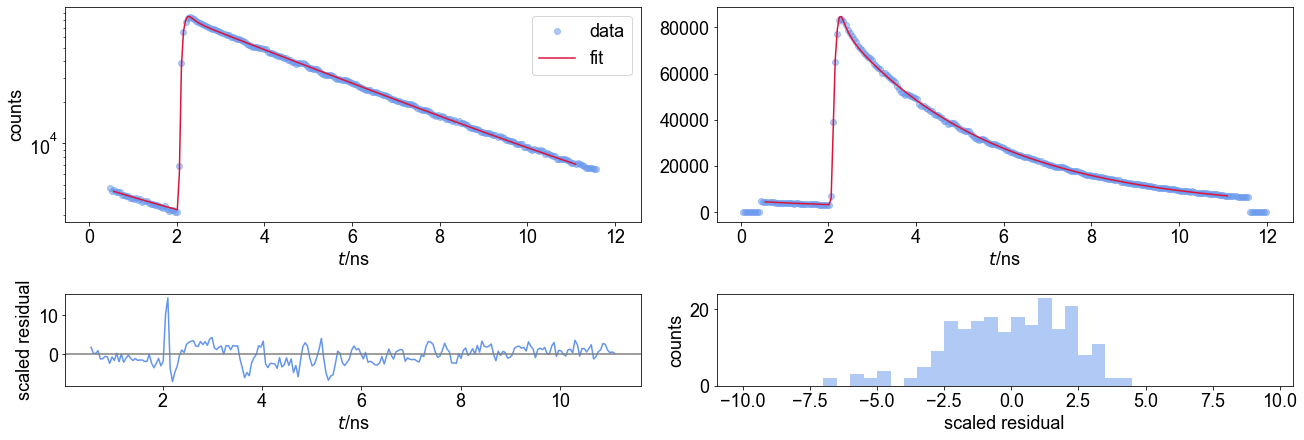

(array([[ 3.44324424,  3.41681047,  3.47088573],
       [ 0.14191619,  0.11089716,  0.17997616],
       [ 0.79813621,  0.77564061,  0.81807754],
       [ 0.99017427,  0.98922845,  0.99115245],
       [12.        ,        -inf, 12.50015224]]), (array([ 0.56206893,  0.60890801,  0.65574709,  0.70258617,  0.74942524,
        0.79626432,  0.8431034 ,  0.88994248,  0.93678156,  0.98362063,
        1.03045971,  1.07729879,  1.12413787,  1.17097694,  1.21781602,
        1.2646551 ,  1.31149418,  1.35833325,  1.40517233,  1.45201141,
        1.49885049,  1.54568957,  1.59252864,  1.63936772,  1.6862068 ,
        1.73304588,  1.77988495,  1.82672403,  1.87356311,  1.92040219,
        1.96724127,  2.01408034,  2.06091942,  2.1077585 ,  2.15459758,
        2.20143665,  2.24827573,  2.29511481,  2.34195389,  2.38879297,
        2.43563204,  2.48247112,  2.5293102 ,  2.57614928,  2.62298835,
        2.66982743,  2.71666651,  2.76350559,  2.81034467,  2.85718374,
        2.90402282,  2.9508619 ,  2.

In [8]:
irf = util.SDT("data/IRF.sdt")
ip  = util.SDT("data/2xIP.sdt")
        
fo = flim.decay_group(ip, irf, modeltype="twoexp")
meanandCI = fo.fit(method="leastsq", plot=True)
print(meanandCI)